## Question 2: Finding Groupings in Human's Mitochondrial SNP/Mutations Patterns

First step is to import modules and data.  The data was cleaned prior to import.  Imputation of most common values was used for NaN.
I will bring in the data as is, dropping the first 3 rows which contain metadata.
I will create a new dataframe dropping the "Group" so I can perform blind analysis to find groupings based on just the SNPs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()

mito = pd.read_csv("C:\Users\heid4253\Documents\Project2Data\Mt1t.mutate.csv")
mito=mito.drop(mito.index[[0,1,2]])
mito1=mito.drop(columns='Group')
mito.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,X,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,J,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Verify my imputation filled in all NaN

In [2]:
np.any(np.isnan(mito1))

False

With so many columns, this project will be a good dataset to use Principle Component Analysis on.
First, I will find how many PCs will explain the majority of variance.

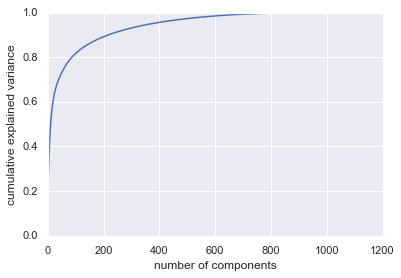

In [2]:
from sklearn.decomposition import PCA
pca = PCA().fit(mito1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [3]:
print(pca.explained_variance_ratio_)

[1.24958163e-01 8.06238492e-02 5.15072173e-02 ... 2.37838836e-34
 7.67295145e-35 4.54635451e-35]


Around 600 and almost all the variance can be explained. I will use 600 components

In [3]:
pca = PCA(n_components=600)
pca.fit(mito1)

PCA(copy=True, iterated_power='auto', n_components=600, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

I will create a new dataframe with the 600 principle components as the columns.

In [4]:
n_components=600
pcadf=pd.DataFrame(pca.transform(mito1), columns=['PCA%i' % i for i in range(n_components)], index=mito1.index)

In [6]:
pcadf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA590,PCA591,PCA592,PCA593,PCA594,PCA595,PCA596,PCA597,PCA598,PCA599
3,-1.442831,0.686765,0.468785,-0.290551,0.314818,-1.315194,-0.243438,-0.115162,-0.218163,0.115118,...,-0.013386,-0.003338,0.011425,0.000815,0.019302,-0.014812,0.002084,0.001618,0.007061,0.003496
4,-1.089354,0.464034,0.540537,-0.543541,-0.722837,0.890805,2.843562,0.941034,-0.516424,0.710239,...,0.071082,0.001793,0.025692,-0.015564,0.022032,0.007701,-0.019634,0.003063,0.029373,0.017032
5,-1.560937,0.531389,0.406607,-0.428215,0.380627,-1.441982,-0.168146,-0.125349,-0.272046,-0.164182,...,-0.000582,-0.000862,0.026951,-0.013128,0.031990,0.008789,0.050541,-0.019872,0.014887,0.046803
6,-0.472741,0.214044,-0.076352,0.473530,-0.276657,0.097556,-0.092443,0.242415,0.276758,0.184610,...,0.054434,-0.047021,0.006071,-0.020054,0.091395,0.020161,0.004946,0.047386,-0.003138,-0.004071
7,-0.962488,0.039957,0.272991,-0.772692,-0.134409,0.732053,1.690528,0.341641,-0.558391,-1.092714,...,0.017148,-0.024674,0.122379,0.010146,0.002473,0.051154,-0.072618,-0.097451,-0.027194,0.087506


PCA took the original data from 2711 columns down to the 600 columns of PCs.

In [5]:
mito_pca=pca.transform(mito1)
print("Original shape: {}".format(str(mito1.shape)))
print("Reduced shape: {}".format(str(mito_pca.shape)))

Original shape: (1074, 2711)
Reduced shape: (1074L, 600L)


Now that the data has been transformed into principle components I will use Kmeans to cluster. First I'll just use 4 clusters and see what my silhouette score is.
I will also run this on the original data for comparison.

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=1).fit(mito_pca)

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=1).fit(mito1)

In [10]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn import metrics
metrics.silhouette_score(mito_pca, kmeans.labels_)

0.13352632125898484

In [12]:
from sklearn import metrics
metrics.silhouette_score(mito1, kmeans.labels_)

0.12922301280478818

I will run an optimization to find the optimal number of clusters on Kmeans for the NON-PCA data first, the on the transformed PCA data to see how they compare.

The optimal number of neighbors is 34


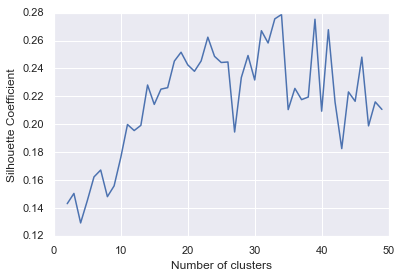

In [13]:
k_range = range(2, 50)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(mito1)
    scores.append(metrics.silhouette_score(mito1, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of neighbors is %d" % optimal_k
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)   

Now find optimal clusters using the PCA data.

The optimal number of clusters is 32


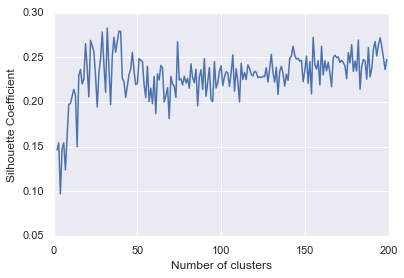

In [8]:
k_range = range(2, 200)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(mito_pca)
    scores.append(metrics.silhouette_score(mito_pca, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of clusters is %d" % optimal_k    
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True) 

Perform a Kmeans clustering using my optimal 34 groups

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=34, random_state=1).fit(mito_pca)

In [14]:
pcadf['cluster'] = kmeans.labels_
pcadf.head(25)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA591,PCA592,PCA593,PCA594,PCA595,PCA596,PCA597,PCA598,PCA599,cluster
3,-1.442831,0.686765,0.468785,-0.290551,0.314818,-1.315194,-0.243438,-0.115162,-0.218163,0.115118,...,-0.003338,0.011425,0.000815,0.019302,-0.014812,0.002084,0.001618,0.007061,0.003496,11
4,-1.089354,0.464034,0.540537,-0.543541,-0.722837,0.890805,2.843562,0.941034,-0.516424,0.710239,...,0.001793,0.025692,-0.015564,0.022032,0.007701,-0.019634,0.003063,0.029373,0.017032,12
5,-1.560937,0.531389,0.406607,-0.428215,0.380627,-1.441982,-0.168146,-0.125349,-0.272046,-0.164182,...,-0.000862,0.026951,-0.013128,0.031990,0.008789,0.050541,-0.019872,0.014887,0.046803,11
6,-0.472741,0.214044,-0.076352,0.473530,-0.276657,0.097556,-0.092443,0.242415,0.276758,0.184610,...,-0.047021,0.006071,-0.020054,0.091395,0.020161,0.004946,0.047386,-0.003138,-0.004071,18
7,-0.962488,0.039957,0.272991,-0.772692,-0.134409,0.732053,1.690528,0.341641,-0.558391,-1.092714,...,-0.024674,0.122379,0.010146,0.002473,0.051154,-0.072618,-0.097451,-0.027194,0.087506,31
8,-1.549502,0.593396,0.368229,-0.366409,0.361041,-1.289755,-0.273492,-0.057009,-0.203714,0.174833,...,-0.169529,-0.061993,-0.057403,0.021154,0.121041,0.115417,0.114731,0.033353,0.081809,11
9,-0.940367,0.065446,0.441097,-0.595312,-0.257467,0.496514,1.835414,0.343657,-0.476738,-1.178674,...,0.071702,-0.173614,-0.039516,-0.008316,-0.058851,0.143552,0.243678,0.020168,-0.258703,31
10,-1.393440,0.598540,0.221834,-0.363701,-0.153558,1.482355,-1.121243,-0.656238,-0.702804,-0.199119,...,0.049504,0.029287,-0.132717,0.100362,-0.023248,0.031143,0.101601,-0.095486,0.124956,29
11,-0.675530,0.209022,0.458243,-0.507701,-0.402114,0.672356,1.422390,0.505934,-0.414067,-0.629994,...,-0.031080,-0.012776,0.022326,0.041683,0.004257,-0.034571,0.016952,0.046424,-0.043793,17
12,-0.449455,0.199273,-0.101737,0.466838,-0.281637,0.055769,-0.087437,0.235892,0.021089,0.212738,...,-0.024783,-0.042396,0.002492,0.011062,0.046811,-0.008125,-0.038542,0.053750,-0.039216,18


In [15]:
pcadf['group'] = mito.Group
pcadf.head(25)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA592,PCA593,PCA594,PCA595,PCA596,PCA597,PCA598,PCA599,cluster,group
3,-1.442831,0.686765,0.468785,-0.290551,0.314818,-1.315194,-0.243438,-0.115162,-0.218163,0.115118,...,0.011425,0.000815,0.019302,-0.014812,0.002084,0.001618,0.007061,0.003496,11,H
4,-1.089354,0.464034,0.540537,-0.543541,-0.722837,0.890805,2.843562,0.941034,-0.516424,0.710239,...,0.025692,-0.015564,0.022032,0.007701,-0.019634,0.003063,0.029373,0.017032,12,T
5,-1.560937,0.531389,0.406607,-0.428215,0.380627,-1.441982,-0.168146,-0.125349,-0.272046,-0.164182,...,0.026951,-0.013128,0.031990,0.008789,0.050541,-0.019872,0.014887,0.046803,11,H
6,-0.472741,0.214044,-0.076352,0.473530,-0.276657,0.097556,-0.092443,0.242415,0.276758,0.184610,...,0.006071,-0.020054,0.091395,0.020161,0.004946,0.047386,-0.003138,-0.004071,18,X
7,-0.962488,0.039957,0.272991,-0.772692,-0.134409,0.732053,1.690528,0.341641,-0.558391,-1.092714,...,0.122379,0.010146,0.002473,0.051154,-0.072618,-0.097451,-0.027194,0.087506,31,J
8,-1.549502,0.593396,0.368229,-0.366409,0.361041,-1.289755,-0.273492,-0.057009,-0.203714,0.174833,...,-0.061993,-0.057403,0.021154,0.121041,0.115417,0.114731,0.033353,0.081809,11,H
9,-0.940367,0.065446,0.441097,-0.595312,-0.257467,0.496514,1.835414,0.343657,-0.476738,-1.178674,...,-0.173614,-0.039516,-0.008316,-0.058851,0.143552,0.243678,0.020168,-0.258703,31,J
10,-1.393440,0.598540,0.221834,-0.363701,-0.153558,1.482355,-1.121243,-0.656238,-0.702804,-0.199119,...,0.029287,-0.132717,0.100362,-0.023248,0.031143,0.101601,-0.095486,0.124956,29,U
11,-0.675530,0.209022,0.458243,-0.507701,-0.402114,0.672356,1.422390,0.505934,-0.414067,-0.629994,...,-0.012776,0.022326,0.041683,0.004257,-0.034571,0.016952,0.046424,-0.043793,17,J
12,-0.449455,0.199273,-0.101737,0.466838,-0.281637,0.055769,-0.087437,0.235892,0.021089,0.212738,...,-0.042396,0.002492,0.011062,0.046811,-0.008125,-0.038542,0.053750,-0.039216,18,X


In [16]:
pcadf.cluster.unique()

array([11, 12, 18, 31, 29, 17, 23,  6, 22,  1, 28, 20,  4,  9, 19, 14, 27,
        0,  5, 25, 10, 24,  3,  8,  7, 15, 30,  2, 16, 32, 13, 33, 26, 21],
      dtype=int64)

In [17]:
pcadf.group.unique()

array(['H', 'T', 'X', 'J', 'U', 'K', 'I', 'W', 'V', 'R', 'M', 'B', 'N',
       'Q', 'D', 'C', 'F', 'O', 'A', 'G', 'L1b', 'S', 'L3e', 'L1', 'L0',
       'L2', 'L3', 'L3h', 'L5', 'Lx', 'Ly'], dtype=object)

There are 31 original groups.

In [20]:
#pcadf.cluster = pcadf.cluster.astype(int)

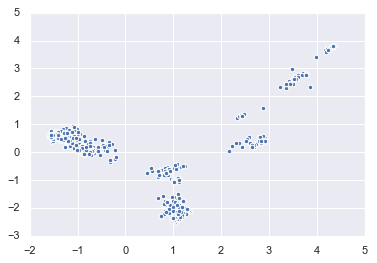

In [21]:
fig=plt.scatter(pcadf.PCA0,pcadf.PCA1)

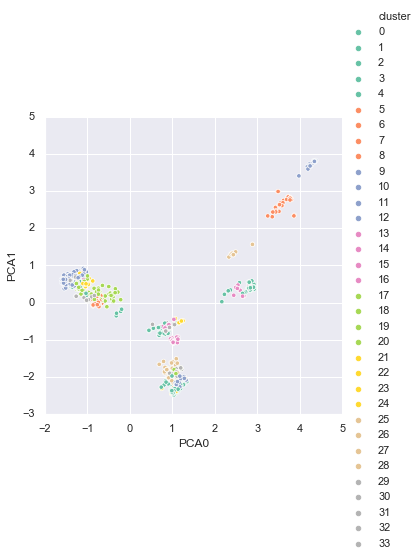

In [18]:
fig2=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="cluster", legend='full', palette= 'Set2')

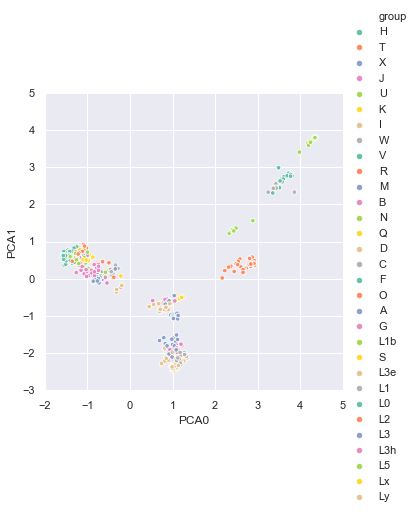

In [19]:
fig3=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="group", palette= 'Set2')

## A. Explore and investigate groupings of individuals. How are your groupings of individuals differ from the given mitochondrial haplogroups?

Crosstab of the groupings and Cluster will show how well my clustering was in comparison to the known groupings.

There were some of the known groups that got cluster into unique groupings with my analysis. There was also some overlap and splitting between some groups. But overall the clustering analysis did a good job

In [20]:
pd.set_option('display.max_columns', 35)
pd.crosstab(pcadf.cluster,pcadf.group,margins=True)

group,A,B,C,D,F,G,H,I,J,K,L0,L1,L1b,L2,L3,L3e,L3h,L5,Lx,Ly,M,N,O,Q,R,S,T,U,V,W,X,All
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,17
2,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,28
4,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62
5,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,37
7,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
8,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12


In [23]:
pcadf.groupby(['cluster','group']).size()

cluster  group
0        H        177
         R          6
         V         13
1        L3e        9
2        L2        49
3        L0        23
4        T         36
5        A         87
6        L1b       27
7        L2        12
8        D         21
9        L3        37
10       U         11
11       J         35
12       K         24
         U          1
13       L1        12
14       B         46
15       D         67
         G         20
         M         19
16       B         14
17       C         33
         M          8
18       M         17
19       W         12
20       Lx         7
21       N         22
22       F          4
23       U         49
24       M          8
25       L3e       10
26       L5         3
27       L3e       31
         L3h        3
         Ly         1
28       L3         8
         L3e        1
         L3h        3
         L5         2
29       B         27
         F          8
         I          6
         N          2
         O       

In [42]:
pcadf.loc[pcadf['cluster']==0,'group']

765    L5
773    L5
774    L5
781    L5
794    L5
795    L5
817    L5
838    L5
841    L5
Name: group, dtype: object

In [46]:
pcadf.loc[pcadf['group']=='A','cluster'].unique()

array([18,  6], dtype=int64)

In [48]:
pd.pivot_table(pcadf,index=["cluster","group"])

PCA0      PCA1     PCA10    PCA100    PCA101    PCA102  \
cluster group                                                               
0       L5     2.517663  1.361393 -0.292174 -0.050772  0.029357  0.011754   
1       H     -1.501003  0.604745 -0.026890  0.000426 -0.000649 -0.002941   
        R     -1.218653  0.572684 -0.034875  0.005456  0.012462  0.034444   
        V     -1.307649  0.459811  0.164863  0.043726  0.004120 -0.025970   
2       L1b    4.289562  3.744287  0.094320 -0.002411  0.002564 -0.000877   
3       L2     2.779654  0.392935  0.339998  0.000514 -0.000193  0.001462   
4       G      1.054811 -1.892324 -0.031918  0.092561  0.045567  0.023917   
        M      0.933443 -1.721278 -0.098999 -0.131509 -0.003731 -0.015223   
5       U     -1.331600  0.635511  0.241025 -0.010043  0.018857  0.002483   
6       A     -0.786265  0.124058 -0.007707  0.226256  0.207224  0.012075   
7       L0     3.658643  2.749952 -0.068298  0.008420 -0.006054  0.004344   
8       L3     0.908332 -0.628580 -0.199714 -0.053265 -0.021038  0.112802   
        L3e    0.803476 -0.743688 -1.300628  0.024538  0.005776 -0.004559   
        L3h    0.795163 -0.592313 -0.205741  0.064858 -0.066600  0.018928   
        Ly     1.103737 -0.547245 -0.672481  0.054423 -0.374305 -0.242973   
9       D      1.097510 -2.174596 -0.757287  0.002546  0.001768  0.003036   
10      L3     1.031123 -1.049821  0.933846  0.000012  0.009563 -0.014726   
11      M      1.003182 -1.923442  0.838317  0.004034  0.003719 -0.007764   
12      T     -1.209219  0.723039 -0.308601 -0.001623  0.003233  0.003814   
13      J     -0.962786  0.097851  0.514815  0.009715 -0.001360 -0.005211   
14      D      1.047903 -2.315120 -0.232211 -0.004725  0.003623 -0.003601   
15      U     -1.397519  0.588428 -0.211754  0.006139 -0.013486  0.003772   
16      I     -0.242259 -0.244345 -0.268004 -0.049175  0.025397  0.005904   
        N     -0.682989  0.093646 -0.679318 -0.026033  0.003248  0.001999   
17      B     -1.298874  0.546222 -0.024732  0.008559 -0.005800 -0.004304   
18      A     -0.809341 -0.027461  0.094240 -0.013257 -0.011785 -0.005075   
19      K     -1.046430  0.574456  1.260843 -0.004197  0.003377  0.004697   
        U     -1.228967  0.541136  0.408230  0.111488  0.106434 -0.019480   
20      L1     3.497885  2.478054  0.527459  0.011789 -0.004352 -0.010492   
21      C      1.145768 -2.170571  1.694588 -0.003072 -0.016887  0.012481   
22      W     -0.406910  0.197941 -0.744524  0.045758  0.015753  0.015478   
23      M      0.997806 -2.054969 -0.938087  0.010326 -0.010750 -0.000207   
24      M      1.014978 -1.586258  0.060528 -0.093597  0.011247 -0.150505   
25      Lx     1.175633 -0.504957 -0.326768  0.004141  0.005198 -0.020221   
26      L2     2.608109  0.287848 -1.634353 -0.006561 -0.008919  0.003511   
27      U     -1.211926  0.570685  0.242950  0.024748  0.005954  0.040317   
28      B     -1.076700  0.387882 -0.026972 -0.034880  0.020114  0.011707   
        F     -1.184982  0.483398 -0.111980  0.004894  0.005289  0.010253   
        N     -0.811763  0.147156 -0.236531 -0.015726 -0.341763 -0.407895   
        O     -0.622849  0.347963  0.016532 -0.118470 -0.118889  0.101612   
        Q     -1.100926  0.404724  0.015370 -0.102859 -0.117104  0.183858   
        S     -0.212993  0.077517 -0.049609  0.459734  0.141211  0.636225   
        U     -1.154420  0.483774  0.250186 -0.002574  0.000376 -0.177345   
        X     -0.439845  0.212728 -0.197615  0.011125 -0.016693  0.051219   
29      B     -0.777966  0.181860  0.258570  0.009427  0.017111  0.016661   

                 PCA103    PCA104    PCA105    PCA106    ...        PCA90  \
cluster group                                            ...                
0       L5    -0.027337 -0.000079  0.010586 -0.010384    ...     0.020985   
1       H     -0.003340 -0.001443 -0.003175 -0.002646    ...    -0.001778   
        R      0.020931  0.014681  0.024675  0.092671    ...     0.066464   
        V     

## B. Explore and investigate groupings of genomic positions where SNP occurrs. How are your groupings of positions relate to the given mitochondrial haplogroups?

For this question, I will first dummy code the group columns as to have all columns binary.
Then I can find frequent itemsets using the apriori function.
Then I can explore the frequent itemsets and see where/if any contain the haploid groupings.

In [28]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
mito.head()

Group  X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  \
3     H   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
4     T   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
5     H   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
6     X   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
7     J   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   

   X16  X17  X18  X19  X20  X21  X22  X23  X24  X25  X26  X27  X28  X29  X30  \
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
7    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  \
3    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    1    0    0    0    0    0    0    0    1    0    0    0   
7    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  \
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    1    1    0    0    0    0   
7    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X72  X73  X74  X75  \
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
7    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  \
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
7    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

   X91  X92  X93  X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  \
3    0    0    0    0    0    0    0    0    0     0     0     0     0     0   
4    0    0    0    0    0    0    0    0    0     0     0     0     0     0   
5    0    0    0    0    0    0    0    0    0     0     0     0     0     0   
6    0    0    0    0    0    0    0    0    0     0     0     0     0     0   
7    0    0    0    0    0    0    0    0    0     0     0     0     0     0   

   X105  X106  X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  \
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   
5     0     0     0     0     0     0     0     0     0     0     0     0   
6     0     0     0     0     0     0     0     0     0     0     0     0   
7     0     0     0     0     0     0     0     0     0     0     0     0   

   X117  X118  X119  X120  X121  X122  X123  X124  X125  X126  X127  X128  \
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     

In [21]:
mitodum=mito

In [22]:
mitodum=pd.get_dummies(mitodum, columns=["Group"])
mitodum.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,...,Group_L3,Group_L3e,Group_L3h,Group_L5,Group_Lx,Group_Ly,Group_M,Group_N,Group_O,Group_Q,Group_R,Group_S,Group_T,Group_U,Group_V,Group_W,Group_X
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I will use apriori to find frequent itemsets. I will limit the max length to 2 to save on computer power, but given the time/CPU/memory you could have any length.

In [25]:
from mlxtend.frequent_patterns import apriori

freq_mito=apriori(mitodum, min_support=0.01, max_len=2, use_colnames=True)
freq_mito['length'] = freq_mito['itemsets'].apply(lambda x: len(x))

In [53]:
freq_mito

,support,itemsets,length
0,0.064246,(X14),1
1,0.033520,(X18),1
2,0.032588,(X30),1
3,0.180633,(X31),1
4,0.023277,(X32),1
5,0.269088,(X33),1
6,0.069832,(X34),1
7,0.058659,(X37),1
8,0.013035,(X39),1
9,0.018622,(X41),1


Now with frequent itemsets generated, I can use association rules at some min threshold, I will choose a min lift of 2 first.

In [27]:
from mlxtend.frequent_patterns import association_rules

#pd.set_option('display.max_columns', 65)
#pd.set_option('display.max_rows', 200)
rules=association_rules(freq_mito, metric="lift", min_threshold=2)
rules.sort_values(['lift'],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6616,(X1815),(X176),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
2994,(X841),(X1720),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
6617,(X176),(X1815),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
3362,(X2060),(X269),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
3363,(X269),(X2060),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
2474,(X841),(X626),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
2475,(X626),(X841),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
7461,(X1720),(X626),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
2995,(X1720),(X841),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf
7460,(X626),(X1720),0.010242,0.010242,0.010242,1.0,97.636364,0.010137,inf


I can search the rules generated from the apriori where the antecedent is a certain group to find SNPs associated.

In [28]:
rules[ rules['antecedents'] == {'Group_H'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1114,(Group_H),(X1772),0.164804,0.179702,0.161080,0.977401,5.439009,0.131464,36.298184
2492,(Group_H),(X955),0.164804,0.015829,0.015829,0.096045,6.067797,0.013220,1.088740
3338,(Group_H),(X2278),0.164804,0.184358,0.164804,1.000000,5.424242,0.134422,inf
5490,(Group_H),(X393),0.164804,0.164804,0.061453,0.372881,2.262568,0.034292,1.331798
5693,(Group_H),(X119),0.164804,0.031657,0.017691,0.107345,3.390828,0.012474,1.084789
6855,(Group_H),(X2605),0.164804,0.469274,0.164804,1.000000,2.130952,0.087466,inf
7311,(Group_H),(X1919),0.164804,0.465549,0.164804,1.000000,2.148000,0.088080,inf
12204,(Group_H),(X357),0.164804,0.166667,0.163873,0.994350,5.966102,0.136406,147.500000
12546,(Group_H),(X986),0.164804,0.163873,0.163873,0.994350,6.067797,0.136866,147.994413


In [29]:
rules[ rules['antecedents'] == {'Group_V'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
241,(Group_V),(X2605),0.012104,0.469274,0.012104,1.000000,2.130952,0.006424,inf
3968,(Group_V),(X1772),0.012104,0.179702,0.012104,1.000000,5.564767,0.009929,inf
5689,(Group_V),(X1919),0.012104,0.465549,0.012104,1.000000,2.148000,0.006469,inf
5829,(Group_V),(X2651),0.012104,0.064246,0.012104,1.000000,15.565217,0.011327,inf
6273,(Group_V),(X2278),0.012104,0.184358,0.012104,1.000000,5.424242,0.009873,inf
6334,(Group_V),(X2513),0.012104,0.010242,0.010242,0.846154,82.615385,0.010118,6.433426
8705,(Group_V),(X617),0.012104,0.011173,0.010242,0.846154,75.730769,0.010107,6.427374


In [31]:
rules[ rules['antecedents'] == {'Group_A'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
430,(Group_A),(X14),0.081006,0.064246,0.049348,0.609195,9.482259,0.044144,2.394430
2274,(Group_A),(X34),0.081006,0.069832,0.061453,0.758621,10.863448,0.055796,3.853551
3999,(Group_A),(X60),0.081006,0.084730,0.081006,1.000000,11.802198,0.074142,inf
4044,(Group_A),(X164),0.081006,0.081006,0.081006,1.000000,12.344828,0.074444,inf
4418,(Group_A),(X652),0.081006,0.081937,0.081006,1.000000,12.204545,0.074368,inf
4420,(Group_A),(X272),0.081006,0.079143,0.079143,0.977011,12.344828,0.072732,40.057263
6990,(Group_A),(X2644),0.081006,0.085661,0.081006,1.000000,11.673913,0.074067,inf
7327,(Group_A),(X1667),0.081006,0.020484,0.013966,0.172414,8.416928,0.012307,1.183582
8122,(Group_A),(X2662),0.081006,0.108007,0.079143,0.977011,9.045779,0.070394,38.801676
8340,(Group_A),(X1146),0.081006,0.076350,0.065177,0.804598,10.538267,0.058992,4.726914


I can also search for a particular position to see which groups it is associated with.
Instead of searching the antecedent with Group, I can search the consequents with the position.
First I will sort my itemsets by support, to see which genomic position shows up the most, then I can see use that position and find associated antecedents.

In [54]:
freq_mito.sort_values(['support'],ascending=False).head(10)

,support,itemsets,length
205,0.480447,(X1586),1
342,0.469274,(X2605),1
249,0.465549,(X1919),1
6772,0.459963,"(X2605, X1919)",2
188,0.406890,(X1447),1
216,0.406890,(X1647),1
5651,0.406890,"(X1447, X1647)",2
173,0.403166,(X1278),1
5933,0.403166,"(X1647, X1586)",2
5643,0.403166,"(X1447, X1586)",2


The position with the highest support in my itemset was X1586, looking at rules with this position as the consequents shows many associated Groups.
Group L1b, Group D, Group L0, Group L1, Group L2, Group L3, Group G, Group C and Group M.

In [56]:
pd.set_option('display.max_rows', 20)
rules[ rules['consequents'] == {'X1586'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
214,(X2282),(X1586),0.179702,0.480447,0.178771,0.994819,2.070611,0.092434,100.273743
359,(X37),(X1586),0.058659,0.480447,0.057728,0.984127,2.048357,0.029545,32.731844
479,(X2031),(X1586),0.011173,0.480447,0.011173,1.000000,2.081395,0.005805,inf
543,(X2279),(X1586),0.028864,0.480447,0.028864,1.000000,2.081395,0.014996,inf
551,(X102),(X1586),0.026071,0.480447,0.025140,0.964286,2.007060,0.012614,14.547486
570,(X2133),(X1586),0.011173,0.480447,0.011173,1.000000,2.081395,0.005805,inf
640,(Group_L1b),(X1586),0.025140,0.480447,0.025140,1.000000,2.081395,0.013061,inf
736,(X88),(X1586),0.031657,0.480447,0.030726,0.970588,2.020178,0.015517,17.664804
746,(X1936),(X1586),0.014898,0.480447,0.014898,1.000000,2.081395,0.007740,inf
756,(X2423),(X1586),0.045624,0.480447,0.045624,1.000000,2.081395,0.023704,inf


Below the parameters of the frequent groupings can be changed to explore larger groupings of SNPs. 

In [57]:
from mlxtend.frequent_patterns import apriori
freq_mito_group=apriori(mitodum, min_support=0.05, max_len=5, use_colnames=True)
freq_mito_group['length'] = freq_mito_group['itemsets'].apply(lambda x: len(x))
freq_mito_group

,support,itemsets,length
0,0.064246,(X14),1
1,0.180633,(X31),1
2,0.269088,(X33),1
3,0.069832,(X34),1
4,0.058659,(X37),1
5,0.202980,(X42),1
6,0.054004,(X49),1
7,0.084730,(X60),1
8,0.067039,(X66),1
9,0.214153,(X129),1


In [58]:
from mlxtend.frequent_patterns import association_rules
rules_group=association_rules(freq_mito_group, metric="lift", min_threshold=2)
rules_group.sort_values(['lift'],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1538169,"(X1858, X405, X1739)","(X1919, X1433)",0.055866,0.055866,0.055866,1.000000,17.9,0.052745,inf
525340,"(X1433, X2055)","(X2635, X405)",0.055866,0.051210,0.051210,0.916667,17.9,0.048350,11.385475
610335,"(X2605, X1739, X405)","(X2635, X2055)",0.055866,0.051210,0.051210,0.916667,17.9,0.048350,11.385475
800078,"(X1858, X1433, Group_U)","(X2635, X1739)",0.055866,0.051210,0.051210,0.916667,17.9,0.048350,11.385475
800077,"(X1739, X1858, X2635)","(X1433, Group_U)",0.051210,0.055866,0.051210,1.000000,17.9,0.048350,inf
800076,"(X1858, Group_U, X2635)","(X1739, X1433)",0.051210,0.055866,0.051210,1.000000,17.9,0.048350,inf
442180,"(X1739, X2055)","(X2605, X1858, X1433)",0.055866,0.055866,0.055866,1.000000,17.9,0.052745,inf
442179,"(X1739, X1433)","(X2605, X1858, X2055)",0.055866,0.055866,0.055866,1.000000,17.9,0.052745,inf
442176,"(X1858, X2055)","(X2605, X1739, X1433)",0.055866,0.055866,0.055866,1.000000,17.9,0.052745,inf
442175,"(X1858, X1433)","(X2605, X1739, X2055)",0.055866,0.055866,0.055866,1.000000,17.9,0.052745,inf


Below are some rules of groupings of SNPs associated with Group H.

In [59]:
rules_group[ rules_group['antecedents'] == {'Group_H'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35710,(Group_H),"(X2605, X1772)",0.164804,0.178771,0.161080,0.977401,5.467338,0.131618,36.339385
65202,(Group_H),"(X986, X1772, X393)",0.164804,0.061453,0.061453,0.372881,6.067797,0.051325,1.496603
83108,(Group_H),"(X2605, X1919, X2278)",0.164804,0.183426,0.164804,1.000000,5.451777,0.134575,inf
89380,(Group_H),"(X2605, X986, X1772)",0.164804,0.160149,0.160149,0.971751,6.067797,0.133756,29.730726
99580,(Group_H),"(X2605, X986, X2278, X1772)",0.164804,0.160149,0.160149,0.971751,6.067797,0.133756,29.730726
114856,(Group_H),"(X2605, X393, X357)",0.164804,0.062384,0.061453,0.372881,5.977232,0.051171,1.495118
121650,(Group_H),"(X393, X2278, X357)",0.164804,0.061453,0.061453,0.372881,6.067797,0.051325,1.496603
125708,(Group_H),"(X2605, X986, X393, X357)",0.164804,0.061453,0.061453,0.372881,6.067797,0.051325,1.496603
129650,(Group_H),(X2278),0.164804,0.184358,0.164804,1.000000,5.424242,0.134422,inf
137474,(Group_H),"(X2278, X1772, X393)",0.164804,0.061453,0.061453,0.372881,6.067797,0.051325,1.496603


Some frequent SNP groupings for Group A

In [61]:
rules_group[ rules_group['antecedents'] == {'Group_A'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
338,(Group_A),"(X60, X1810, X2644, X2682)",0.081006,0.065177,0.065177,0.804598,12.344828,0.059897,4.784095
1714,(Group_A),"(X60, X652, X1810, X34)",0.081006,0.061453,0.061453,0.758621,12.344828,0.056475,3.888268
13062,(Group_A),"(X2682, X1300, X2662, X272)",0.081006,0.072626,0.072626,0.896552,12.344828,0.066743,8.964618
13818,(Group_A),"(X2682, X1300, X272, X164)",0.081006,0.073557,0.073557,0.908046,12.344828,0.067598,10.075070
16997,(Group_A),"(X1810, X2662)",0.081006,0.064246,0.064246,0.793103,12.344828,0.059042,4.522812
17565,(Group_A),"(X652, X1810, X34, X272)",0.081006,0.061453,0.061453,0.758621,12.344828,0.056475,3.888268
21914,(Group_A),"(X2682, X272, X34, X2662)",0.081006,0.060521,0.060521,0.747126,12.344828,0.055619,3.715211
22407,(Group_A),"(X652, X584, X34, X164)",0.081006,0.061453,0.061453,0.758621,12.344828,0.056475,3.888268
22510,(Group_A),"(X2682, X584, X1810)",0.081006,0.065177,0.065177,0.804598,12.344828,0.059897,4.784095
24962,(Group_A),"(X2662, X1146, X272, X2682)",0.081006,0.064246,0.064246,0.793103,12.344828,0.059042,4.522812


Try some clustermaps and dendrograms using binary data

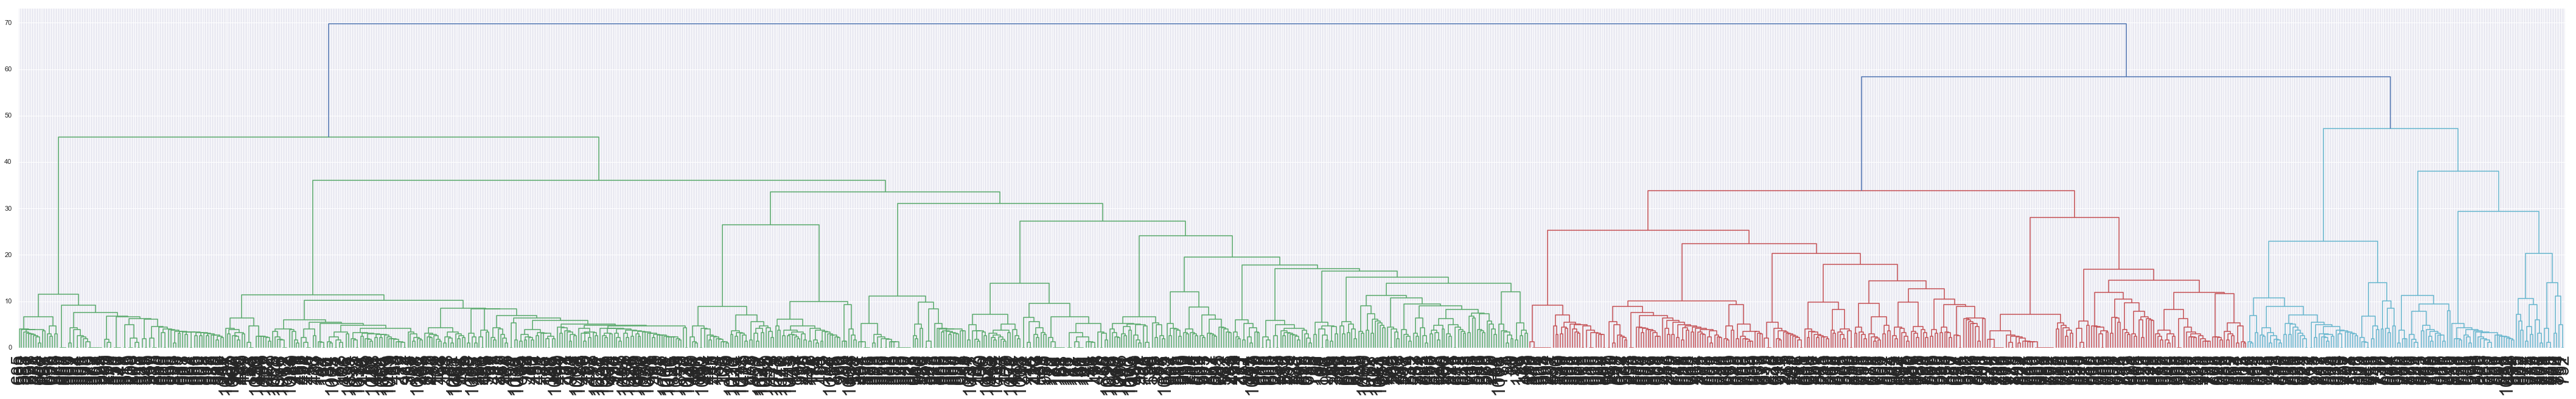

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

H=linkage (mito1,'ward')
plt.figure(figsize=(75,10))
dendro=dendrogram(H, leaf_font_size=30)


In [72]:
from scipy.spatial.distance import pdist, squareform
dm=squareform(pdist(mito1))

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


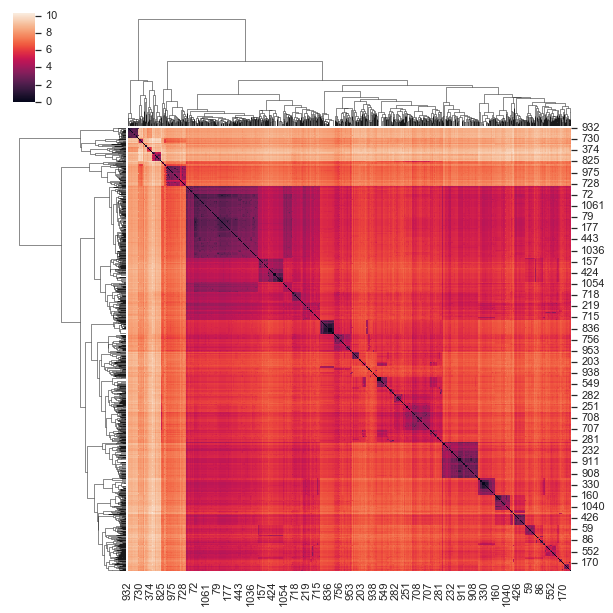

In [89]:
h=sns.clustermap(dm,metric='euclidean')

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


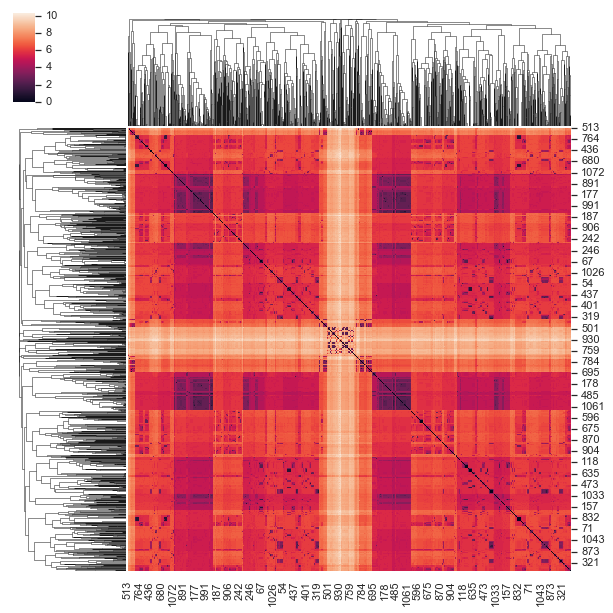

In [79]:
h=sns.clustermap(dm,metric="jaccard")

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


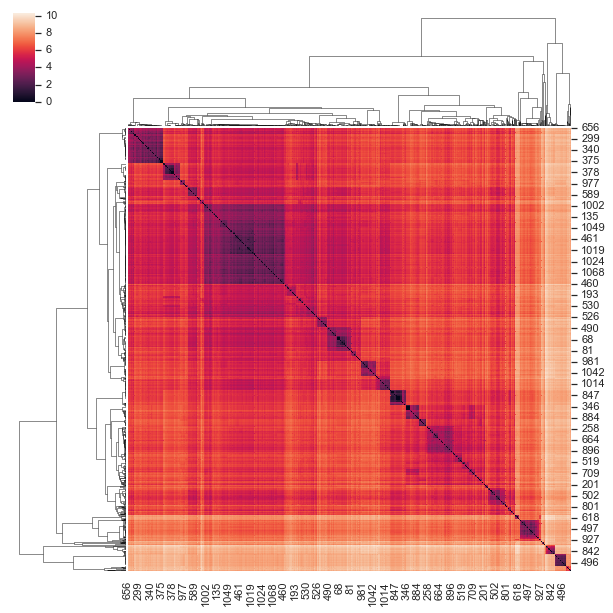

In [85]:
h=sns.clustermap(dm,metric="correlation")

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


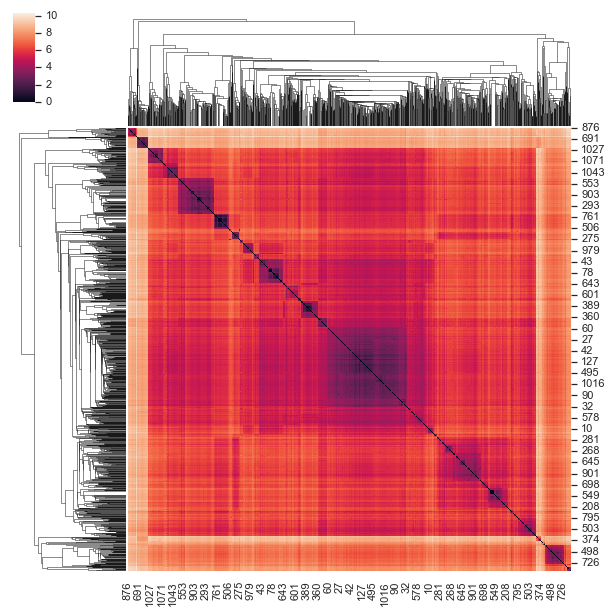

In [74]:
h=sns.clustermap(dm,method="single")